In [59]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [60]:
print(train_labels.shape)
print(test_labels.shape)
print(train_labels)

(25000,)
(25000,)
[1 0 0 ... 0 1 0]


In [61]:
print("Type:",type(train_data))
print("shape:",train_data.shape)
print("dimlen1:",len(train_data[0]))
print("dimlen2:",len(train_data[1]))
print("flags:",train_data.flags)
print("flags:",train_data.flags)

Type: <class 'numpy.ndarray'>
shape: (25000,)
dimlen1: 218
dimlen2: 189
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
flags:   C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False


In [62]:
import numpy as np

lengths = [len(x) for x in train_data]
print(len(lengths))
print(min(lengths))
print(max(lengths))
print(np.mean(lengths))
print(np.std(lengths))

25000
11
2494
238.71364
176.49367364852034


In [63]:
word_index = imdb.get_word_index()
print(type(word_index))
print(len(word_index))

<class 'dict'>
88584


In [64]:
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()]
)

idx = 0
label = train_labels[idx]
review = train_data[idx]
decoded_review = " ".join(
    [reverse_word_index.get(index - 3, "?") for index in review]
)
print(label)
print(decoded_review)


1
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [65]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros([len(sequences),dimension]) #matrix with only 0s, each row is a sequence
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0; #fancy indexing
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [66]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [67]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(
    16, 
    activation="relu",
    input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_11 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [68]:
from keras import optimizers, losses, metrics

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

#model.compile(
#    optimizer=optimizers.RMSprop(lr=0.001), #same AS "rmsprop", but you can spezify parameters
#    loss=losses.binary_crossentropy,
#    metrics=[metrics.binary_accuracy]
#)

In [69]:
#split you training data into a validation set (10k) and an actual training set (15k)
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
print(x_val.shape)
print(partial_x_train.shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

(10000, 10000)
(15000, 10000)


In [70]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=3,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/3
15000/15000 [==============================] - 2s 135us/step - loss: 0.4981 - acc: 0.7945 - val_loss: 0.3720 - val_acc: 0.8714
Epoch 2/3
15000/15000 [==============================] - 2s 103us/step - loss: 0.2960 - acc: 0.9047 - val_loss: 0.2991 - val_acc: 0.8905
Epoch 3/3
15000/15000 [==============================] - 2s 105us/step - loss: 0.2161 - acc: 0.9287 - val_loss: 0.3085 - val_acc: 0.8719


available keys: dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


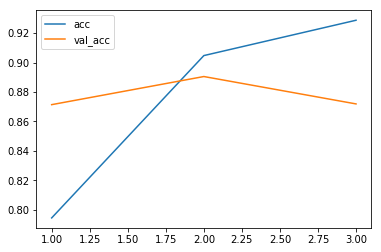

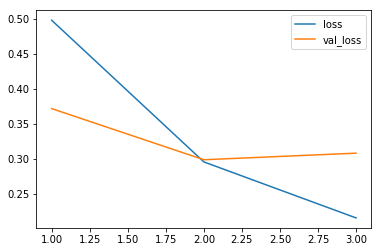

In [71]:
import matplotlib.pyplot as plt

print("available keys:",history.history.keys())
r = range(1, len(history.history["acc"]) + 1)
#r = range(1, len(history.history["binary_accuracy"]) + 1)

#plt.plot(r, history.history["binary_accuracy"], label="acc")
#plt.plot(r, history.history["val_binary_accuracy"], label="val_acc")
#plt.legend()
#plt.show()
#plt.close()

plt.plot(r, history.history["acc"], label="acc")
plt.plot(r, history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()

plt.plot(r, history.history["loss"], label="loss")
plt.plot(r, history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()
